In [21]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

# Problem 6.1

In [5]:
# Problem 6.1
mean = 0.0
std = 1.0
N = 50
sample_generator = torch.distributions.Normal(mean, std)
samples = sample_generator.sample((N,))

# P6.1 Compute the square of each sample and record the average
samples.square().mean()

tensor(0.7462)

# Problem 6.2

In [49]:
# P6.2 Compute the estimator T times
T = 50
estimators = [(sample_generator.sample((N,))).square().mean().item() for i in range(T)]
mean = np.mean(estimators)
std = np.std(estimators)
std

0.18128779864147673

# Problem 6.3(A)

[[10.854389454252013, 18.267171864183172], [9.561431233882905, 4.799733233449349], [9.877097930908203, 1.9590385411132993], [9.938786916732788, 1.5573714609819649], [9.921476850509643, 0.9582612686629485], [9.96716851234436, 0.6086864385648383], [9.993071165084839, 0.41086452832110637], [9.976598720550538, 0.15048812253635147]]


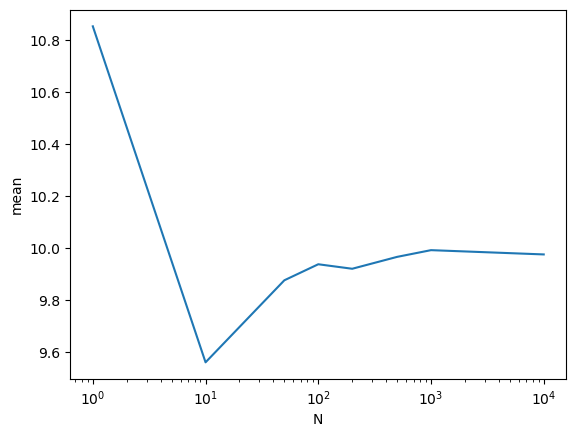

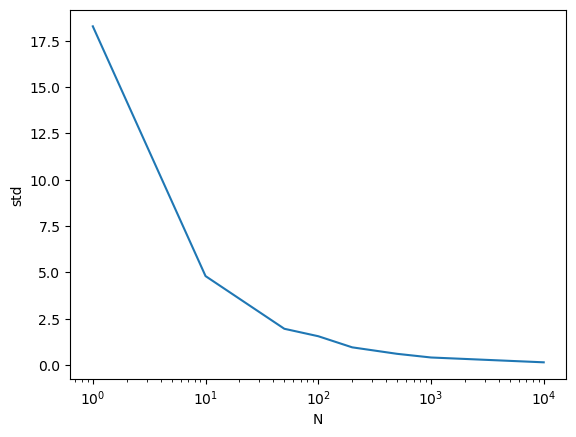

In [59]:
# P6.3
def generate_T_sample(mean, std, N):
    sample_generator = torch.distributions.Normal(mean, std)
    samples = sample_generator.sample((N,))
    return samples

def compute_estimator_desc(mean, std, N, T):
    T_samples = [generate_T_sample(mean , std, N).square().mean().item() for _ in range(T)]
    estimator_mean = np.mean(T_samples)
    estimator_std = np.std(T_samples)
    return [estimator_mean, estimator_std]

def collect_estimator(mean, std, N_list, T):
    return [compute_estimator_desc(mean, std, N, T) for N in N_list]

def plot_estimator(estimators_desc, N_list):
    print(estimators_desc)
    mean_list = list(map(lambda x: x[0], estimators_desc))
    std_list = list(map(lambda x: x[1], estimators_desc))
    plt.plot()
    plt.semilogx(N_list, mean_list)
    plt.xlabel("N")
    plt.ylabel("mean")
    plt.show()
    plt.semilogx(N_list, std_list)
    plt.xlabel("N")
    plt.ylabel("std")
    plt.show()

N_list = [1,10,50,100,200,500,1000, 10000]
mean = 0
std = np.sqrt(10)
T = 100
estimators_desc = collect_estimator(mean, std, N_list, T)
plot_estimator(estimators_desc, N_list)

# Problem 6.3(B)

Observation:
- $\hat{\mu_N}=\frac{1}{N}\sum_ix_i^2$ is an unbiased estimator for $\sigma^2$ since it is always close to the true variance, no matter what value $N$ takes.
- It is also consistent since we observe that the variance of this estimator goes to zero as $N\to \infty$, and the plot verifies this.

Claim, $\hat{\mu_N}$ is an unbiased and consistent estimator of $\sigma^2$.


Proof:
- MGF of $X_i$: $M_X(t)=e^{\frac{\sigma^2t^2}{2}}$.
- Second Moment: $\nabla M_X(t)\big|_{t=0}=\sigma^2$
- Fourth Moment: $\nabla^{(4)} M_X(t)\big|_{t=0}=5\sigma^4$
- Unbiasedness: $E[\hat{\mu_N}]=\frac{1}{N}\sum_{i=1}^NE[X_i^2]=\frac{\sigma^2}{N}\cdot N=\sigma^2$
- Consistency: $\lim_{N\to \infty} P(|\widehat{\mu_N}-\sigma^2|>\epsilon)\leq \frac{Var(\widehat{\mu_N})}{k^2}=\frac{5\sigma^4}{Nk^2}$(using theorem from problem 4E), by squeeze theorem we have consistency.